In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from enum import Enum
import requests
import pandas as pd
import numpy as np
import datetime
import collections as col
import scipy as sp
import time

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
SYMBOL_STATUS = Enum('SYMBOL_STATUS', 'PRE_TRADING TRADING POST_TRADING END_OF_DAY HALT AUCTION_MATCH BREAK')
SYMBOL_TYPE = Enum('SYMBOL_TYPE', 'SPOT')
ORDER_STATUS = Enum('ORDER_STATUS', 'NEW PARTIALLY_FILLED FILLED CANCELED PENDING_CANCEL REJECTED EXPIRED')
ORDER_TYPES = Enum('ORDER_TYPES', 'LIMIT MARKET STOP_LOSS STOP_LOSS_LIMIT TAKE_PROFIT TAKE_PROFIT_LIMIT LIMIT_MAKER')
ORDER_SIDE = Enum('ORDER_SIDE', 'BUY SELL')
TIME_FORCE = Enum('TIME_FORCE', 'GTC IOK FOK')
CANDLE_INT = Enum('CANDLE_INT', '1m 3m 5m 15m 30m 1h 2h 4h 6h 8h 12h 1d 3d 1w 1M')
RATE_LIMIT = Enum('RATE_LIMIT', 'REQUESTS ORDERS')
RATE_LIMIT_INT = Enum('RATE_LIMIT_INT', 'SECOND MINUTE DAY')

In [6]:
BASE_ENDPOINT = 'https://api.binance.com'

# Public Endpoints
TEST_CONNECT = '/api/v1/ping'
SERVER_TIME = '/api/v1/time'

CANDLE = '/api/v1/klines'

In [17]:
def collectOLHCData(symbol, intv):
    data = []
    counter = 1000
    endTime = int(time.time()*1000)
    df = pd.DataFrame(data=None, columns=['OPEN_TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'CLOSE_TIME', 'QUOTE_VOL', 'NUM_TRADES', 'TAKE_BASE_VOL', 'TAKE_QUOTE_VOL', 'EXTRA'])
    while(counter > 0):
        counter -= 1
        response = requests.get(BASE_ENDPOINT+CANDLE+'?symbol='+symbol+'&interval='+intv+'&endTime='+str(endTime))
        if len(response.json()) == 0:
            print('Data collected from '+str(endTime)+' onwards!!!')
            break
        df = pd.DataFrame(
            data=np.array(response.json()), 
            columns=['OPEN_TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'CLOSE_TIME', 'QUOTE_VOL', 'NUM_TRADES', 'TAKE_BASE_VOL', 'TAKE_QUOTE_VOL', 'EXTRA']
        )
        data.append(df)
        endTime = int(df.OPEN_TIME.min())-1
    return pd.concat(data, ignore_index=True).sort_values(by='OPEN_TIME')

In [23]:
# Post processing
def post_process_data(df):
    df = df.replace(to_replace='\.', value='', regex=True).reset_index(drop=True)

    df.OPEN  = df.OPEN.astype(int)
    df.HIGH  = df.HIGH.astype(int)
    df.LOW   = df.LOW.astype(int)
    df.CLOSE = df.CLOSE.astype(int)
    df.VOLUME = df.VOLUME.astype(int)
    df.QUOTE_VOL = df.QUOTE_VOL.astype(int)
    df.TAKE_BASE_VOL = df.TAKE_BASE_VOL.astype(int)
    df.TAKE_QUOTE_VOL = df.TAKE_QUOTE_VOL.astype(int)

    return df

In [25]:
symbol = 'ETHBTC'

for interval in ['1m','5m','15m','30m','1h','2h','4h','8h','12h','1d']:
    df = collectOLHCData(symbol, interval)
    df = df.sort_values('OPEN_TIME', axis=0, ascending=True, inplace=False).reset_index(drop=True)
    df.shape
    df.head()
    
    strt = df.OPEN_TIME.min()
    end = df.OPEN_TIME.max()

    df.to_csv('data/'+symbol+'_'+interval+'_'+strt+'_'+end+'.csv', index=False)

(500000, 12)

OPEN_TIME        OPEN        HIGH         LOW       CLOSE       VOLUME  \
0  1519496760000  0.08554100  0.08557000  0.08540700  0.08547300  27.71400000   
1  1519496820000  0.08547300  0.08557000  0.08544800  0.08544900  20.12800000   
2  1519496880000  0.08544800  0.08556900  0.08540000  0.08553800  45.51000000   
3  1519496940000  0.08553800  0.08554600  0.08540200  0.08554000  22.23100000   
4  1519497000000  0.08553900  0.08555200  0.08546400  0.08546400  15.24300000   

      CLOSE_TIME   QUOTE_VOL NUM_TRADES TAKE_BASE_VOL TAKE_QUOTE_VOL EXTRA  
0  1519496819999  2.37034530        192   15.30800000     1.30973257     0  
1  1519496879999  1.72060861        122    6.57900000     0.56265396     0  
2  1519496939999  3.89017645        209   19.42600000     1.66096036     0  
3  1519496999999  1.90051350        105   14.32000000     1.22448288     0  
4  1519497059999  1.30341209        117    8.37300000     0.71621867     0

Data collected from 1500004799999 onwards!!!


(164444, 12)

OPEN_TIME        OPEN        HIGH         LOW       CLOSE       VOLUME  \
0  1500004800000  0.08000000  0.08000000  0.08000000  0.08000000   0.72600000   
1  1500005100000  0.08000000  0.08000100  0.08000000  0.08000100   3.34700000   
2  1500005400000  0.08000100  0.08640000  0.08000100  0.08640000   4.67900000   
3  1500005700000  0.08528900  0.08562000  0.08512800  0.08512800  53.43100000   
4  1500006000000  0.08527400  0.08600000  0.08527400  0.08600000   5.57600000   

      CLOSE_TIME   QUOTE_VOL NUM_TRADES TAKE_BASE_VOL TAKE_QUOTE_VOL  \
0  1500005099999  0.05808000          6    0.00000000     0.00000000   
1  1500005399999  0.26776002          9    0.00000000     0.00000000   
2  1500005699999  0.40243412         11    3.26800000     0.28235520   
3  1500005999999  4.56426273         15    0.00000000     0.00000000   
4  1500006299999  0.47900093         10    2.55100000     0.21905131   

            EXTRA  
0  22435.37386441  
1  22447.69970492  
2  22463.04312579  
3  22466.79552579  
4  22466.24181764

Data collected from 1500004799999 onwards!!!


(54818, 12)

OPEN_TIME        OPEN        HIGH         LOW       CLOSE       VOLUME  \
0  1500004800000  0.08000000  0.08640000  0.08000000  0.08640000   8.75200000   
1  1500005700000  0.08528900  0.08600000  0.08512800  0.08581100  61.04200000   
2  1500006600000  0.08581100  0.08638000  0.08581100  0.08631400  53.76900000   
3  1500007500000  0.08631400  0.08638000  0.08630900  0.08634700  42.81800000   
4  1500008400000  0.08587400  0.08620500  0.08460800  0.08468000  16.52000000   

      CLOSE_TIME   QUOTE_VOL NUM_TRADES TAKE_BASE_VOL TAKE_QUOTE_VOL  \
0  1500005699999  0.72827414         26    3.26800000     0.28235520   
1  1500006599999  5.21707930         33    2.73800000     0.23502709   
2  1500007499999  4.63174036         41   21.22500000     1.82964343   
3  1500008399999  3.69725252         61    7.94800000     0.68629479   
4  1500009299999  1.40422828         15    1.17600000     0.10091373   

            EXTRA  
0  22463.04312579  
1  22462.78067765  
2  22488.75368873  
3  22453.07054023  
4  22458.22261920

Data collected from 1500004799999 onwards!!!


(27411, 12)

OPEN_TIME        OPEN        HIGH         LOW       CLOSE  \
0  1500004800000  0.08000000  0.08640000  0.08000000  0.08581100   
1  1500006600000  0.08581100  0.08638000  0.08581100  0.08634700   
2  1500008400000  0.08587400  0.08620500  0.08458100  0.08585000   
3  1500010200000  0.08585000  0.08600000  0.08534100  0.08539900   
4  1500012000000  0.08539900  0.08709700  0.08539800  0.08688300   

         VOLUME     CLOSE_TIME    QUOTE_VOL NUM_TRADES TAKE_BASE_VOL  \
0   69.79400000  1500006599999   5.94535344         59    6.00600000   
1   96.58700000  1500008399999   8.32899288        102   29.17300000   
2   38.66400000  1500010199999   3.30084986         58   11.45700000   
3   75.32800000  1500011999999   6.45175155        180   10.88600000   
4  197.45100000  1500013799999  17.01413981         39  118.03500000   

  TAKE_QUOTE_VOL           EXTRA  
0     0.51738229  22462.78067765  
1     2.51593822  22453.07054023  
2     0.98175859  22449.96289882  
3     0.93403301  22444.02168266  
4    10.21103136  22250.33409019

Data collected from 1500004799999 onwards!!!


(13710, 12)

OPEN_TIME        OPEN        HIGH         LOW       CLOSE  \
0  1500004800000  0.08000000  0.08640000  0.08000000  0.08634700   
1  1500008400000  0.08587400  0.08620500  0.08458100  0.08539900   
2  1500012000000  0.08539900  0.08737900  0.08539800  0.08720000   
3  1500015600000  0.08700500  0.08866900  0.08700000  0.08859100   
4  1500019200000  0.08625200  0.08888800  0.08625200  0.08888800   

         VOLUME     CLOSE_TIME    QUOTE_VOL NUM_TRADES TAKE_BASE_VOL  \
0  166.38100000  1500008399999  14.27434632        161   35.17900000   
1  113.99200000  1500011999999   9.75260141        238   22.34300000   
2  215.00700000  1500015599999  18.54324414         55  131.18600000   
3  150.77000000  1500019199999  13.18367170         30  140.33500000   
4   80.34100000  1500022799999   7.10316602         50   64.90300000   

  TAKE_QUOTE_VOL           EXTRA  
0     3.03332051  22453.07054023  
1     1.91579160  22444.02168266  
2    11.35601969  22236.72057863  
3    12.26648894  22132.44981418  
4     5.73400089  22111.39988203

Data collected from 1500004799999 onwards!!!


(6859, 12)

OPEN_TIME        OPEN        HIGH         LOW       CLOSE  \
0  1500004800000  0.08000000  0.08640000  0.08000000  0.08539900   
1  1500012000000  0.08539900  0.08866900  0.08539800  0.08859100   
2  1500019200000  0.08625200  0.08927300  0.08625200  0.08876100   
3  1500026400000  0.08870700  0.08890200  0.08833900  0.08881700   
4  1500033600000  0.08865700  0.08881700  0.08688300  0.08743300   

         VOLUME     CLOSE_TIME    QUOTE_VOL NUM_TRADES TAKE_BASE_VOL  \
0  280.37300000  1500011999999  24.02694773        399   57.52200000   
1  365.77700000  1500019199999  31.72691584         85  271.52100000   
2  140.49400000  1500026399999  12.44730850        190   77.41000000   
3   68.68400000  1500033599999   6.09330985        176   28.97500000   
4  208.40300000  1500040799999  18.26089716        413  100.61900000   

  TAKE_QUOTE_VOL           EXTRA  
0     4.94911211  22444.02168266  
1    23.62250863  22132.44981418  
2     6.84598480  22117.91781544  
3     2.57130477  22114.57011654  
4     8.81960759  22094.31469546

Data collected from 1500004799999 onwards!!!


(3433, 12)

OPEN_TIME        OPEN        HIGH         LOW       CLOSE  \
0  1500004800000  0.08000000  0.08866900  0.08000000  0.08859100   
1  1500019200000  0.08625200  0.08927300  0.08625200  0.08881700   
2  1500033600000  0.08865700  0.08881700  0.08628800  0.08628800   
3  1500048000000  0.08599900  0.08871200  0.08547700  0.08850000   
4  1500062400000  0.08900000  0.09103300  0.08900000  0.09099300   

         VOLUME     CLOSE_TIME    QUOTE_VOL NUM_TRADES TAKE_BASE_VOL  \
0  646.15000000  1500019199999  55.75386357        484  329.04300000   
1  209.17800000  1500033599999  18.54061835        366  106.38500000   
2  383.63100000  1500047999999  33.47636384        689  162.21600000   
3  252.52900000  1500062399999  21.83415970        373  127.27300000   
4  450.56900000  1500076799999  40.63351850         82  351.48800000   

  TAKE_QUOTE_VOL           EXTRA  
0    28.57162074  22132.44981418  
1     9.41728957  22114.57011654  
2    14.17494274  22116.41789749  
3    11.03767902  22264.10868257  
4    31.62374015  22262.26697743

Data collected from 1499990399999 onwards!!!


(1719, 12)

OPEN_TIME        OPEN        HIGH         LOW       CLOSE  \
0  1499990400000  0.08000000  0.08866900  0.08000000  0.08859100   
1  1500019200000  0.08625200  0.08927300  0.08625200  0.08628800   
2  1500048000000  0.08599900  0.09103300  0.08547700  0.09099300   
3  1500076800000  0.09099300  0.09287400  0.08962500  0.09255300   
4  1500105600000  0.09260700  0.09369900  0.08928800  0.08996200   

          VOLUME     CLOSE_TIME     QUOTE_VOL NUM_TRADES TAKE_BASE_VOL  \
0   646.15000000  1500019199999   55.75386357        484  329.04300000   
1   592.80900000  1500047999999   52.01698219       1055  268.60100000   
2   703.09800000  1500076799999   62.46767820        455  478.76100000   
3   608.72400000  1500105599999   55.72972192        814  349.89000000   
4  1481.23200000  1500134399999  136.64397694       1487  829.04800000   

  TAKE_QUOTE_VOL           EXTRA  
0    28.57162074  22132.44981418  
1    23.59223231  22116.41789749  
2    42.66141917  22262.26697743  
3    32.02489666  22182.14265076  
4    76.43663060  22194.17305801

Data collected from 1499990399999 onwards!!!


(1147, 12)

OPEN_TIME        OPEN        HIGH         LOW       CLOSE  \
0  1499990400000  0.08000000  0.08927300  0.08000000  0.08881700   
1  1500033600000  0.08865700  0.09103300  0.08547700  0.09099300   
2  1500076800000  0.09099300  0.09369900  0.08962500  0.09266100   
3  1500120000000  0.09239900  0.09305100  0.08712700  0.08763500   
4  1500163200000  0.08750800  0.08763500  0.07609900  0.07633500   

          VOLUME     CLOSE_TIME     QUOTE_VOL NUM_TRADES  TAKE_BASE_VOL  \
0   855.32800000  1500033599999   74.29448192        850   435.42800000   
1  1086.72900000  1500076799999   95.94404204       1144   640.97700000   
2  1682.28300000  1500119999999  155.06893033       1874   948.24000000   
3  2330.78300000  1500163199999  207.96285752       2749  1302.07800000   
4  4180.82400000  1500206399999  341.74684630       3800  2677.41100000   

  TAKE_QUOTE_VOL           EXTRA  
0    37.98891031  22114.57011654  
1    56.83636191  22262.26697743  
2    87.35897216  22151.04380020  
3   116.18252539  22275.36801826  
4   218.59416350  22255.16663814

Data collected from 1499990399999 onwards!!!


(574, 12)

OPEN_TIME        OPEN        HIGH         LOW       CLOSE  \
0  1499990400000  0.08000000  0.09103300  0.08000000  0.09099300   
1  1500076800000  0.09099300  0.09369900  0.08712700  0.08763500   
2  1500163200000  0.08750800  0.08763500  0.07559100  0.08224100   
3  1500249600000  0.08236800  0.08839400  0.08169900  0.08753700   
4  1500336000000  0.08783100  0.10906800  0.08477700  0.10773200   

          VOLUME     CLOSE_TIME     QUOTE_VOL NUM_TRADES  TAKE_BASE_VOL  \
0  1942.05700000  1500076799999  170.23852396       1994  1076.40500000   
1  4013.06600000  1500163199999  363.03178785       4623  2250.31800000   
2  8904.15800000  1500249599999  722.21248196       8137  5557.57500000   
3  6650.93300000  1500335999999  568.24653804       7639  3859.48500000   
4  7245.74100000  1500422399999  674.49785037       8121  4202.05500000   

  TAKE_QUOTE_VOL           EXTRA  
0    94.82527222  22262.26697743  
1   203.54149755  22275.36801826  
2   450.34388688  22295.47295841  
3   329.66875309  22165.74281157  
4   393.11140275  22505.62469176

In [13]:
df.OPEN = df.OPEN.astype(float)
df.CLOSE = df.CLOSE.astype(float)
df.HIGH = df.HIGH.astype(float)
df.LOW = df.LOW.astype(float)

df.VOLUME = df.VOLUME.astype(float)
df.QUOTE_VOL = df.QUOTE_VOL.astype(float)
df.TAKE_BASE_VOL = df.TAKE_BASE_VOL.astype(float)
df.TAKE_QUOTE_VOL = df.TAKE_QUOTE_VOL.astype(float)

df.OPEN_TIME = df.OPEN_TIME.astype(int)
df.OPEN_TIME = df.OPEN_TIME/1000
df.OPEN_TIME = df.OPEN_TIME.apply(datetime.datetime.fromtimestamp)
df.CLOSE_TIME = df.CLOSE_TIME.astype(int)
df.CLOSE_TIME = df.CLOSE_TIME/1000
df.CLOSE_TIME = df.CLOSE_TIME.apply(datetime.datetime.fromtimestamp)

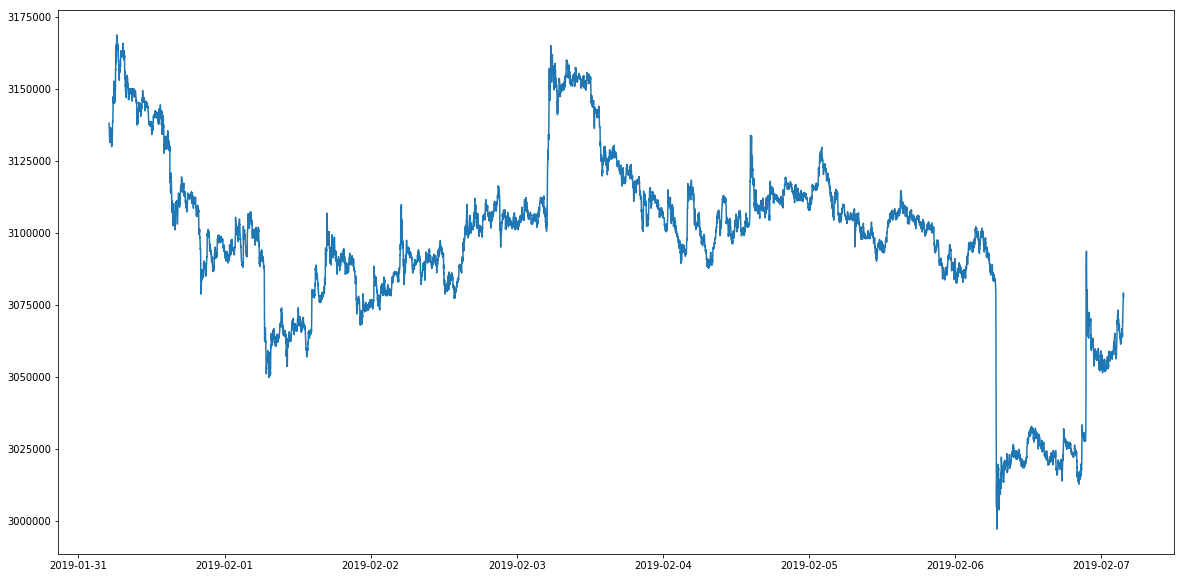

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(df.CLOSE_TIME[-10000:], df.CLOSE.astype(float)[-10000:])
plt.show()